In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from utils import model23 
from utils import constants as c

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# function to get current ETH price and Curve pool stats

model23.get_current_market_stats()
print(f'Current wstETH:stETH rate {model23.get_wsteth_steth_price():,.4f}')

Current ETH price $1,719
Curve pool current stats:
ETH balance: 235,285
stETH balance: 241,954
stETH:ETH: 0.99871
ETH:stETH: 1.0005
Current wstETH:stETH rate 1.1290


In [5]:
## function to get current risk structure in Bin1 (Aave v2)

model23.v2get_b1_current_risks()


Current risk structure of Bin1 (Aave v2)
Bin1(v2) stats on 2023-06-19 15:23:53:
Bin1(v2): Total amount of stETH locked: 229,672 stETH
Bin1(v2): Total number of stETH collateral: 271


,risk_rating,stETH,cnt,percent,average,median,health factor,risk ratio
0,A,"51,074.48",116.00,22.24,440.30,6.81,1.42 - >,0 - 70%
1,B+,"77,078.32",90.00,33.56,856.43,9.38,1.21 - 1.42,70% - 83%
2,B,"49,043.48",47.00,21.35,"1,043.48",76.42,1.14 - 1.21,83% - 88%
3,B-,"4,253.21",8.00,1.85,531.65,219.44,1.07 - 1.14,88% - 93%
4,C,"48,179.82",5.00,20.98,"9,635.96",19.12,1.03 - 1.07,93% - 97%
5,D,42.26,5.00,0.02,8.45,0.61,1.00 - 1.03,97% - 100%
6,liquidation,0.00,0.00,0.00,0.00,0.00,=< 1.00,>=100%


In [6]:
## function to get current risk structure in Bin1 (Aave v3)

model23.v3get_b1_current_risks()

Current risk structure of Bin1 (Aave v3)
Bin1(v3) stats on 2023-06-19 15:23:53:
Bin1(v3): Total amount of wstETH locked: 165,222 stETH
Bin1(v3): Total number of wstETH collateral: 123


,risk_rating,wstETH,cnt,percent,average,median,health factor,risk ratio
0,A,703.69,12.00,0.43,58.64,8.11,1.42 - >,0 - 70%
1,B+,"50,054.64",19.00,30.30,"2,634.45",61.73,1.21 - 1.42,70% - 83%
2,B,"10,682.88",19.00,6.47,562.26,84.68,1.14 - 1.21,83% - 88%
3,B-,"83,821.44",59.00,50.73,"1,420.70",161.61,1.05 - 1.14,88% - 95%
4,C,"19,959.52",14.00,12.08,"1,425.68",533.67,1.03 - 1.05,95% - 97%
5,D,0.00,0.00,0.00,0.00,0.00,1.00 - 1.03,97% - 100%
6,liquidation,0.00,0.00,0.00,0.00,0.00,=< 1.00,>=100%


In [7]:
# function to estimate Bin1(v2) liquidation's risk structure with stETH:ETH rate change in range [current stETH:ETH rate, new_peg] (snapshot)          
# params:   new_peg 

model23.v2get_b1_risks_for_range_of_peg(0.92)


,1:1.0,1:0.99,1:0.98,1:0.97,1:0.96,1:0.95,1:0.94,1:0.93,1:0.92
A,"51,074.48","50,325.54","50,325.16","50,201.89","45,227.54","45,150.03","44,650.98","25,817.36","25,708.52"
B+,"77,078.32","77,062.03","76,024.58","61,580.14","49,485.84","76,035.66","75,890.82","93,666.36","94,343.81"
B,"49,043.48","49,496.18","43,165.35","36,051.76","39,776.22","33,749.15","34,087.02","34,148.25","24,631.37"
B-,"4,253.21","2,987.09","10,379.46","31,772.90","45,116.89","51,191.77","49,063.60","49,514.32","53,365.52"
C,"48,179.82","49,758.47","1,903.85","1,866.59","1,866.59",287.95,"2,386.62","2,699.14","8,427.70"
D,42.26,42.26,"47,854.94","48,179.82","48,179.82","1,903.65","1,866.59","1,866.59",287.95
liquidation,0.00,0.00,18.22,18.47,18.66,"21,353.37","21,725.94","21,959.55","22,906.70"


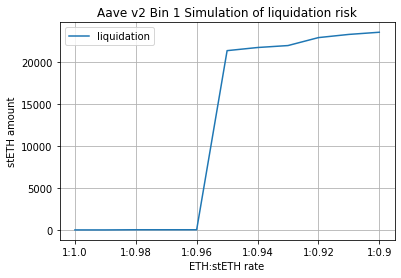

In [8]:
# function to plot Bin1(v2) liquidation's risk by stETH:ETH rate change
# params: new_peg - plot liquidation amount in range [current stETH:ETH rate, new_peg]

model23.v2plot_b1_liquidation_risk_by_peg(0.9)

In [9]:
# function to estimate Bin1(v3) liquidation's risk structure with stETH:ETH rate change in range [current stETH:ETH rate, new_peg] (snapshot)          
# params:   new_peg 

model23.v3get_b1_risks_for_range_of_peg(0.92)


,1:1.0,1:0.99,1:0.98,1:0.97,1:0.96,1:0.95,1:0.94,1:0.93,1:0.92
A,703.69,703.69,703.69,703.69,703.69,703.69,703.69,703.69,703.69
B+,"50,054.64","47,247.44","47,002.79","46,280.06","47,020.47","47,035.24","47,036.74","47,021.75","16,653.48"
B,"11,849.52","13,336.98","13,297.48","11,292.28","10,958.15","4,553.97","3,933.14","1,125.94","31,997.70"
B-,"82,654.79","80,441.22","78,664.30","59,601.10","58,800.96","32,421.23","32,212.36","21,912.15","14,415.78"
C,"19,959.52","7,306.90","5,594.39","23,852.20","22,357.44","34,076.74","33,647.07","13,930.16","20,824.63"
D,0.00,"16,185.94","19,959.52","23,492.84","10,061.02","27,385.51","25,007.94","53,793.15","34,930.24"
liquidation,0.00,0.00,0.00,0.00,"15,320.43","19,045.79","22,681.23","26,735.32","45,696.64"


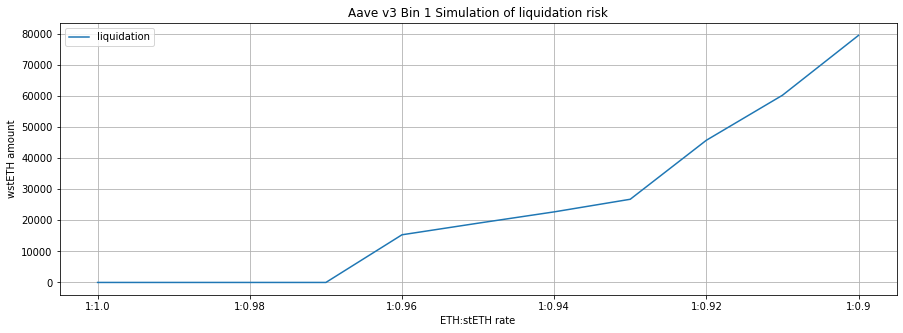

In [10]:
# function to plot Bin1(v3) liquidation's risk by stETH:ETH rate change
# params: new_peg - plot liquidation amount in range [current stETH:ETH rate, new_peg]

model23.v3plot_b1_liquidation_risk_by_peg(0.9)

In [11]:
# function to get current risk structure in SubBin21 (v2)

model23.v2get_b21_current_risks()

Current risk structure of SubBin21 (Aave v2)
SubBin21(v2) stats on 2023-06-19 15:23:59:
SubBin21(v2): Total stETH amount locked: 313,569 stETH
SubBin21(v2): Total number of positions with stETH collateral: 648


,risk_rating,stETH,cnt,percent,average,median,health factor,risk ratio
0,A,"97,212.53",248.00,31.00,391.99,21.48,2.50 - >,0 - 40%
1,B+,"70,272.83",189.00,22.41,371.81,25.07,1.75 - 2.50,40% - 57%
2,B,"33,200.59",90.00,10.59,368.90,24.00,1.50 - 1.75,57% - 67%
3,B-,"62,668.86",84.00,19.99,746.06,50.24,1.25 - 1.50,67% - 80%
4,C,"49,819.17",33.00,15.89,"1,509.67",55.62,1.10 - 1.25,80% - 91%
5,D,394.57,4.00,0.13,98.64,43.89,1.00 - 1.10,91% - 100%
6,liquidation,0.00,0.00,0.00,0.00,0.00,=< 1.00,>=100%


In [12]:
# function to get current risk structure in SubBin21 (v3)

model23.v3get_b21_current_risks()

Current risk structure of SubBin21 (Aave v3)
SubBin21(v3) stats on 2023-06-19 15:23:59:
SubBin21(v3): Total wstETH amount locked: 101,305 wstETH
SubBin21(v3): Total number of positions with wstETH collateral: 302


,risk_rating,wstETH,cnt,percent,average,median,health factor,risk ratio
0,A,"33,255.77",116.00,32.83,286.69,26.62,2.50 - >,0 - 40%
1,B+,"26,528.69",95.00,26.19,279.25,22.13,1.75 - 2.50,40% - 57%
2,B,"4,849.42",43.00,4.79,112.78,24.69,1.50 - 1.75,57% - 67%
3,B-,"15,629.93",27.00,15.43,578.89,27.53,1.25 - 1.50,67% - 80%
4,C,"20,544.75",17.00,20.28,"1,208.51",11.76,1.10 - 1.25,80% - 91%
5,D,496.57,4.00,0.49,124.14,67.16,1.00 - 1.10,91% - 100%
6,liquidation,0.00,0.00,0.00,0.00,0.00,=< 1.00,>=100%


In [13]:
# function to estimate SubBin21(v2) risk structure with ETH price's change            
# params: price_change_prc - % of change price, e.g e.g. 0.05 means that price changed by 5% ($1200->$1140)

model23.v2get_b21_risks_for_changed_price(0.1)

,1547.0
,
risk,
A,"77,744.68"
B+,"65,451.74"
B,"28,372.17"
B-,"41,126.73"
C,"63,135.39"
D,"37,562.56"
liquidation,175.29


In [14]:
# function to estimate SubBin21(v2) liquidation's risk structure with ETH price's change in range [current price, current price*max_price_change_prc]           
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v2get_b21_risks_for_range_changed_price(0.80, 10)

,1718.94,1708.0,1698.0,1688.0,1678.0,1668.0,1658.0,1648.0,1638.0,1628.0,...,1468.0,1458.0,1448.0,1438.0,1428.0,1418.0,1408.0,1398.0,1388.0,1378.0
A,"97,212.53","97,161.74","96,879.11","96,782.49","96,698.37","95,984.55","95,933.30","95,182.74","95,050.12","94,969.79",...,"75,195.53","74,139.99","74,137.45","74,128.38","74,075.25","74,021.00","73,834.48","72,927.88","71,463.09","71,463.09"
B+,"70,272.83","70,293.88","58,779.13","58,734.90","54,279.58","54,126.21","53,985.13","54,516.19","54,449.94","54,271.76",...,"66,997.76","67,989.48","65,779.17","64,327.20","63,808.46","64,550.13","64,931.53","65,547.89","66,292.21","65,914.25"
B,"33,200.59","33,015.23","44,810.08","44,863.63","49,403.07","36,053.97","36,060.51","36,264.80","34,941.18","35,072.43",...,"49,658.65","38,636.98","39,918.96","37,099.26","36,732.12","36,581.59","36,398.45","36,141.91","35,754.55","35,905.32"
B-,"62,668.86","42,418.65","41,315.19","35,936.60","35,359.79","49,520.76","36,288.65","35,291.97","36,260.23","33,452.00",...,"39,036.17","50,071.70","50,716.74","49,854.59","50,525.10","50,549.90","50,713.28","51,179.00","38,050.60","38,124.06"
C,"49,819.17","70,284.49","71,390.48","76,856.37","77,411.85","76,450.71","89,691.58","90,703.47","91,206.87","94,175.10",...,"29,235.58","26,116.58","25,322.19","30,637.47","17,062.88","17,167.22","17,249.33","15,299.11","28,535.50","28,622.41"
D,394.57,394.57,394.57,394.57,415.90,"1,432.35","1,609.40","1,609.40","1,660.22","1,600.83",...,"42,585.06","45,677.39","46,689.28","46,221.23","59,992.50","58,646.02","57,981.08","59,931.30","60,729.15","60,697.62"
liquidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.65,...,"10,859.80","10,936.45","11,004.77","11,300.44","11,372.25","12,052.70","12,460.40","12,541.48","12,743.46","12,841.81"


In [15]:
# function to estimate SubBin21(v3) liquidation's risk structure with ETH price's change in range [current price, current price*max_price_change_prc]           
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v3get_b21_risks_for_range_changed_price(0.80, 10)

,1718.94,1708.0,1698.0,1688.0,1678.0,1668.0,1658.0,1648.0,1638.0,1628.0,...,1468.0,1458.0,1448.0,1438.0,1428.0,1418.0,1408.0,1398.0,1388.0,1378.0
A,"33,255.77","32,790.16","32,790.16","32,781.11","32,781.11","32,747.75","32,708.88","32,708.88","32,707.32","32,706.76",...,"28,604.55","28,474.19","28,474.19","28,462.50","28,451.80","28,405.94","28,405.94","25,031.60","24,913.69","24,906.21"
B+,"26,528.69","26,952.38","26,914.93","26,889.39","26,889.39","26,903.63","26,391.84","25,491.38","25,416.18","25,281.49",...,"26,441.13","26,565.64","25,966.12","25,976.47","25,798.27","25,799.80","26,541.87","32,166.85","33,725.38","37,462.41"
B,"4,849.42","3,384.12","3,418.52","3,448.09","3,313.69","2,755.54","3,250.38","3,979.50","3,940.91","3,950.45",...,"4,717.92","4,685.01","5,248.62","5,248.62","4,902.02","4,725.41","4,019.95","3,950.40","3,826.82","3,826.82"
B-,"15,629.93","8,787.11","8,790.17","8,794.10","8,924.77","9,502.03","9,557.86","8,060.36","8,174.71","8,300.42",...,"7,505.87","5,665.34","5,672.40","5,086.32","4,624.09","4,221.00","4,918.38","4,862.18","4,370.21","4,351.73"
C,"20,544.75","28,893.68","28,893.68","28,894.76","28,898.50","28,896.95","28,896.95","30,565.84","30,539.15","30,478.71",...,"4,660.55","6,538.53","4,896.17","5,482.25","6,473.96","7,096.13","7,094.19","6,597.57","7,230.66","7,249.14"
D,496.57,497.68,497.68,497.68,497.68,499.23,499.23,498.89,526.58,587.02,...,"28,808.82","28,808.82","30,478.71","30,478.71","30,414.52","30,414.52","25,241.02","21,322.16","17,616.01","10,682.06"
liquidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.29,0.29,...,566.30,567.60,568.92,570.26,640.49,642.35,"5,083.79","7,374.39","9,622.36","12,826.76"


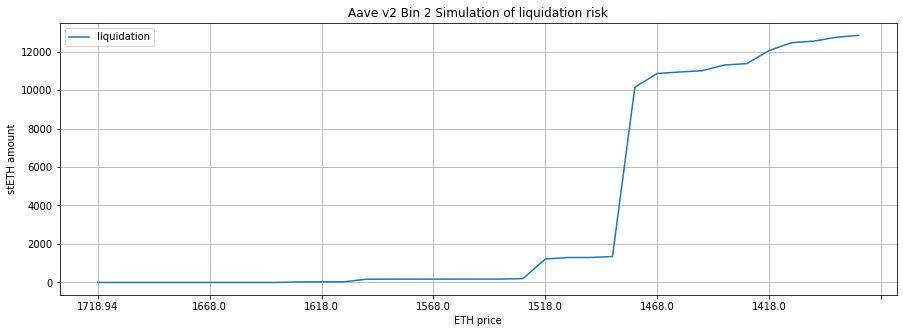

In [16]:
# function to plot SubBin21(v2) liquidation's risk by price change
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v2plot_b2_liquidation_risk_by_price(0.8, 10)

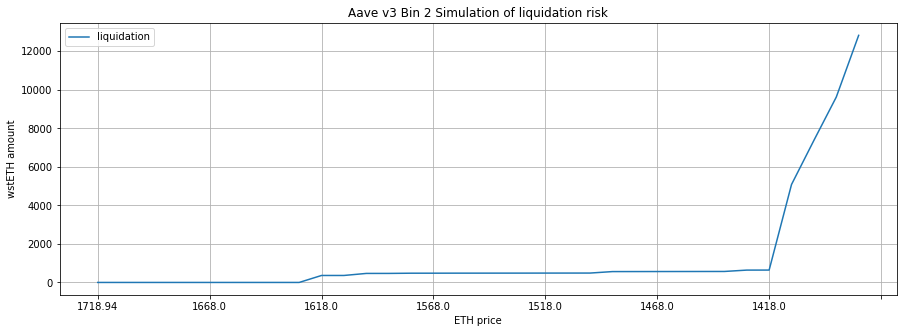

In [17]:
# function to plot SubBin21(v3) liquidation's risk by price change
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v3plot_b2_liquidation_risk_by_price(0.8, 10)

In [18]:
## function to get current risk structure in SubBin31(v2)

model23.v2get_b31_current_risks()


Current risk structure of SubBin31 (Aave v2)
SubBin31(v2) stats on 2023-06-19 15:24:12:
SubBin31(v2): Total stETH amount locked: 272,615 stETH
SubBin31(v2): Total number of positions with stETH collateral: 53


,risk_rating,stETH,cnt,percent,average,median,health factor,risk ratio
0,A,"174,491.83",7.00,64.01,"24,927.40",23.32,2.50 - >,0 - 40%
1,B+,419.41,13.00,0.15,32.26,5.29,1.75 - 2.50,40% - 57%
2,B,936.08,9.00,0.34,104.01,46.20,1.50 - 1.75,57% - 67%
3,B-,"93,211.91",17.00,34.19,"5,483.05",48.91,1.25 - 1.50,67% - 80%
4,C,"3,555.94",7.00,1.30,507.99,411.72,1.10 - 1.25,80% - 91%
5,D,0.00,0.00,0.00,0.00,0.00,1.00 - 1.10,91% - 100%
6,liquidation,0.00,0.00,0.00,0.00,0.00,=< 1.00,>=100%


In [19]:
## function to get current risk structure in SubBin31(v3)

model23.v3get_b31_current_risks()

Current risk structure of SubBin31 (Aave v3)
SubBin31(v3) stats on 2023-06-19 15:24:12:
SubBin31(v3): Total wstETH amount locked: 2,106 wstETH
SubBin31(v3): Total number of positions with wstETH collateral: 11


,risk_rating,wstETH,cnt,percent,average,median,health factor,risk ratio
0,A,3.34,1.00,0.16,3.34,3.34,2.50 - >,0 - 40%
1,B+,72.62,2.00,3.45,36.31,36.31,1.75 - 2.50,40% - 57%
2,B,160.16,1.00,7.60,160.16,160.16,1.50 - 1.75,57% - 67%
3,B-,"1,723.05",5.00,81.81,344.61,57.78,1.25 - 1.50,67% - 80%
4,C,147.04,1.00,6.98,147.04,147.04,1.10 - 1.25,80% - 91%
5,D,0.01,1.00,0.00,0.01,0.01,1.00 - 1.10,91% - 100%
6,liquidation,0.00,0.00,0.00,0.00,0.00,=< 1.00,>=100%


In [20]:
# function to estimate SubBin31(v2) liquidation's risk structure with stETH:ETH rate change in range [current stETH:ETH rate, new_peg] (snapshot)          
# params:   new_peg 

model23.v2get_b31_risks_for_range_of_peg(0.85)

,1:1.0,1:0.99,1:0.98,1:0.97,1:0.96,1:0.95,1:0.94,1:0.93,1:0.92,1:0.91,1:0.9,1:0.89,1:0.88,1:0.87,1:0.86,1:0.85
A,"174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,484.58","174,484.58","174,248.82","174,248.82","174,248.82"
B+,419.41,419.41,419.41,419.41,419.41,395.55,395.55,395.55,395.55,395.55,392.95,400.19,400.19,"1,482.53","1,478.48","1,475.54"
B,936.08,936.08,718.94,628.29,174.29,194.16,139.06,132.73,132.73,104.83,107.43,107.43,107.43,72.67,73.85,73.85
B-,"93,211.91","93,211.91","93,426.34","92,203.33","92,453.09","92,457.08","92,512.18","92,497.11","92,071.42","92,062.20","92,049.05","92,023.49","91,618.13","91,649.56","87,205.73","87,205.73"
C,"3,555.94","3,555.94","3,558.65","4,872.30","3,983.21","3,983.21","3,983.21","3,155.58","3,581.27","3,125.40","2,017.97","2,043.53","2,448.90","2,452.22","6,893.34","6,798.60"
D,0.00,0.00,0.00,0.00,"1,093.34","1,093.34","1,093.34","1,942.37","1,942.37","2,435.36","3,555.94","3,555.94","3,555.94","2,462.60","2,465.31","2,560.05"
liquidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,246.77,249.64,252.57


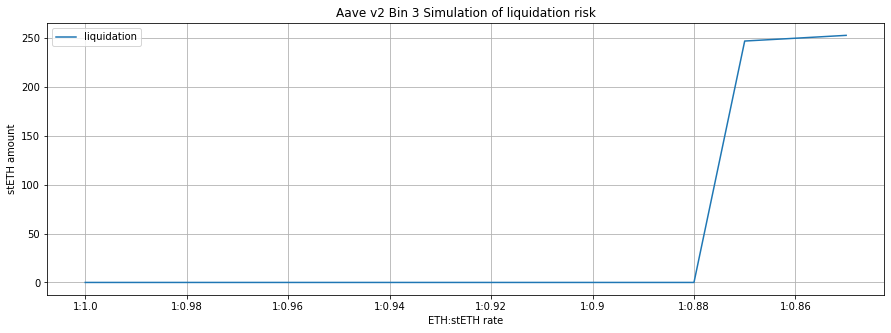

In [21]:
# function to plot SubBin31(v2) liquidation's risk by stETH:ETH rate change
# params:   new_peg - plot liquidation amount in range [current stETH:ETH rate, new_peg]

model23.v2plot_b3_liquidation_risk_by_peg(0.85)

In [22]:
# function to estimate SubBin31(v3) liquidation's risk structure with stETH:ETH rate change in range [current stETH:ETH rate, new_peg] (snapshot)          
# params:   new_peg 

model23.v3get_b31_risks_for_range_of_peg(0.85)

,1:1.0,1:0.99,1:0.98,1:0.97,1:0.96,1:0.95,1:0.94,1:0.93,1:0.92,1:0.91,1:0.9,1:0.89,1:0.88,1:0.87,1:0.86,1:0.85
A,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34
B+,72.62,72.62,72.62,72.62,72.62,72.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
B,160.16,160.16,160.16,160.16,160.16,160.16,232.78,232.78,232.78,232.78,232.78,232.78,232.78,232.78,232.78,232.78
B-,"1,723.05","1,723.05","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26","1,665.26",130.77
C,147.04,147.04,204.83,204.83,204.83,204.83,204.83,204.83,204.83,57.78,57.78,57.78,57.78,57.78,0.00,"1,534.50"
D,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,147.06,147.06,147.04,147.04,147.04,204.83,204.83
liquidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01


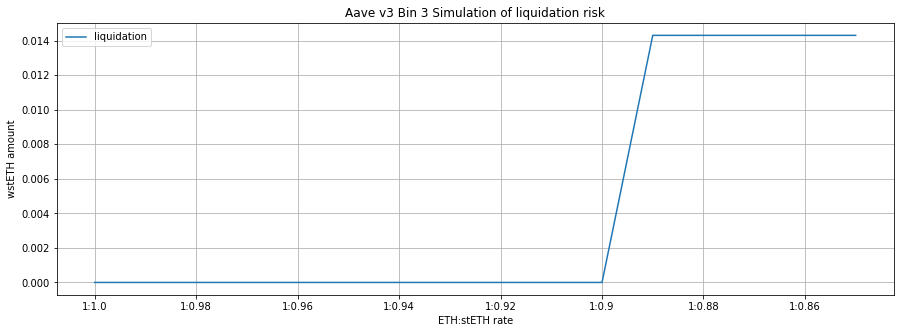

In [23]:
# function to plot SubBin31(v3) liquidation's risk by stETH:ETH rate change
# params:   new_peg - plot liquidation amount in range [current stETH:ETH rate, new_peg]

model23.v3plot_b3_liquidation_risk_by_peg(0.85)

In [24]:
# function to estimate SubBin31(v2) risk structure with ETH price's change            
# params: price_change_prc - % of change price, e.g e.g. 0.05 means that price changed by 5% ($1200->$1140)

model23.v2get_b31_risks_for_changed_price(0.13)

,1495.0
,
risk,
A,"174,484.58"
B+,402.79
B,710.91
B-,"93,363.49"
C,"2,558.89"
D,"1,094.50"
liquidation,0.00


In [25]:
# function to estimate SubBin31(v2) liquidation's risk structure with ETH price's change in range [current price, current price*max_price_change_prc]           
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v2get_b31_risks_for_range_changed_price(0.85, 30)

,1718.94,1688.0,1658.0,1628.0,1598.0,1568.0,1538.0,1508.0,1478.0
A,"174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,491.83","174,484.58","174,484.58"
B+,419.41,419.41,419.41,419.41,419.41,395.55,395.55,402.79,402.79
B,936.08,936.08,936.08,718.94,718.94,742.80,714.90,714.90,710.91
B-,"93,211.91","93,211.91","93,209.20","93,380.50","93,380.50","93,380.50","93,359.50","93,359.50","93,363.49"
C,"3,555.94","3,555.94","3,558.65","3,604.48","3,604.48","2,511.14","2,560.05","2,558.89","2,558.89"
D,0.00,0.00,0.00,0.00,0.00,"1,093.34","1,093.34","1,094.50","1,094.50"
liquidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


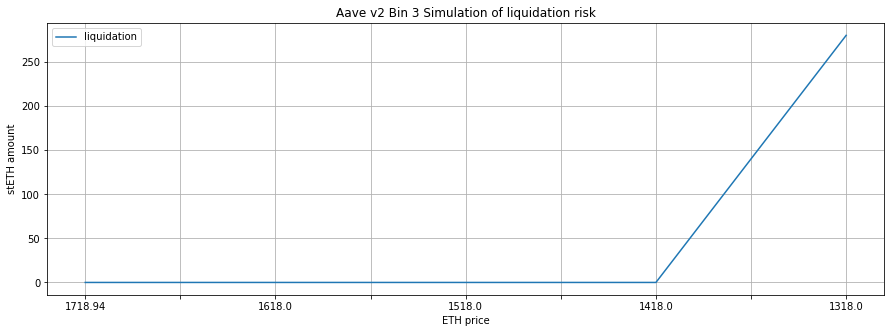

In [26]:
# function to plot SubBin31(v2) liquidation's risk by price change
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v2plot_b3_liquidation_risk_by_price(0.75, 100)

In [27]:
# function to estimate SubBin31(v3) liquidation's risk structure with ETH price's change in range [current price, current price*max_price_change_prc]           
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v3get_b31_risks_for_range_changed_price(0.85, 30)

,1718.94,1688.0,1658.0,1628.0,1598.0,1568.0,1538.0,1508.0,1478.0
A,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34,3.34
B+,72.62,72.62,72.62,72.62,69.38,69.38,0.00,0.00,0.00
B,160.16,160.16,160.16,160.16,163.40,163.40,232.78,232.78,232.78
B-,"1,723.05","1,723.05","1,723.05","1,723.05","1,723.05","1,723.05","1,723.05","1,723.05","1,723.05"
C,147.04,147.04,147.04,147.04,147.04,147.04,147.04,147.04,147.04
D,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
liquidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


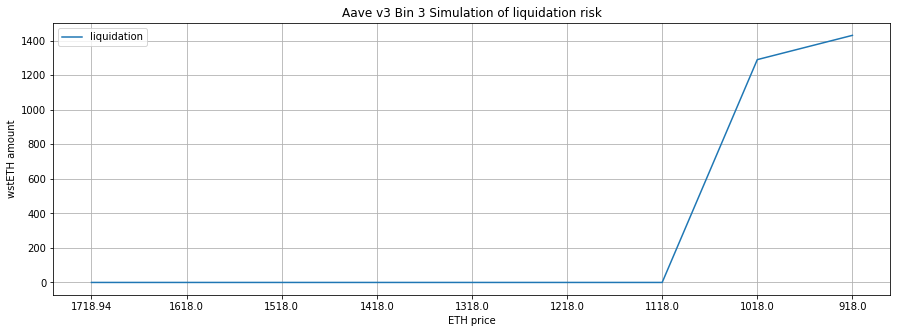

In [28]:
# function to plot SubBin31(v3) liquidation's risk by price change
# params:   max_price_change_prc - price change in range [current price, current price*max_price_change_prc], e.g. for max_price_change_prc=0.2 [1,200;240]
#           step - step for price change in range, e.g. $100

model23.v3plot_b3_liquidation_risk_by_price(0.5, 100)

In [29]:
# function to estimate stETH:ETH rate after swap of "swap_amount" of stETH for ETH in Curve pool and following liquidations
swap_amount = 92000 
newp = model23.get_peg_after_exchange_steth_for_eth(swap_amount)
print(f'stETH:ETH rate after swap of {swap_amount:,.0f} stETH for ETH and following liquidations: {newp:,.3f}')   

stETH:ETH rate after swap 92,000 stETH for ETH and following liquidations: 0.965


In [38]:
# function to estimate the stETH:ETH rate after remove of "remove_amount" ETH from Curve pool and following liquidations
remove_amount = 98000 
newp = model23.get_peg_after_remove_eth_one(remove_amount)
print(f'stETH:ETH rate after remove of {remove_amount:,.0f} ETH from pool and following liquidations: {newp:,.3f}')   

stETH:ETH rate after remove 98,000 ETH from pool and following liquidations: 0.977


In [31]:
# function to estimate the stETH:ETH rate and amount of stETH at exchange which could start cascade liquidations   

(vpeg,vamount) = model23.get_peg_and_exchange_amount_to_start_cascade_liq()
print(f'stETH:ETH rate when could start cascade liquidations: {vpeg:,.3f}')
print(f'stETH amount to exchange in Curve LP start cascade liquidations: {vamount:,.0f}')

stETH:ETH rate when could start cascade liquidations: 0.964
stETH amount to exchange in Curve LP start cascade liquidations: 94,000


In [32]:
# function to estimate amount of stETH at exchange which could start cascade liquidations with log 

(vpeg,vamount) = model23.get_peg_and_exchange_amount_to_start_cascade_liq_with_log()
print(f'stETH:ETH rate when could start cascade liquidations: {vpeg}')
print(f'stETH amount to exchange in Curve LP start cascade liquidations: {vamount:,.0f}')


Exchanged amount:80,000
ETH balance: 235,285
stETH balance: 241,954
Pool stats after exchange:
ETH balance: 156,360
stETH balance: 321,954
stETH->ETH: 0.97164
ETH->stETH: 1.02839
b1v2 cumulative liquidated: 18.47 stETH
b3v2 cumulative liquidated: 0.00 stETH
b1v3 cumulative liquidated: 0.00 wstETH (0.00 stETH)
b3v3 cumulative liquidated: 0.00 wstETH (0.00 stETH)
liquidated in iteration: 18.47 stETH
ETH balance: 156,342
stETH balance: 321,972
stETH->ETH: 0.97162

Exchanged amount:82,000
ETH balance: 235,285
stETH balance: 241,954
Pool stats after exchange:
ETH balance: 154,418
stETH balance: 323,954
stETH->ETH: 0.97063
ETH->stETH: 1.02945
b1v2 cumulative liquidated: 18.47 stETH
b3v2 cumulative liquidated: 0.00 stETH
b1v3 cumulative liquidated: 0.00 wstETH (0.00 stETH)
b3v3 cumulative liquidated: 0.00 wstETH (0.00 stETH)
liquidated in iteration: 18.47 stETH
ETH balance: 154,400
stETH balance: 323,972
stETH->ETH: 0.97063

Exchanged amount:84,000
ETH balance: 235,285
stETH balance: 241,954

In [33]:
# function to estimate stETH:ETH rate for changed ETH price and return it after possible liquidations  
# params: new ETH price ($) 
new_price = 1300
newp = model23.get_peg_for_eth_price(new_price)
print(f'stETH:ETH rate after ETH price drop to ${new_price}  {newp:,.3f}')

stETH:ETH rate after ETH price drop to $1300  0.982


In [34]:
# function to estimate ETH price when could start cascade liquidations  
price = model23.get_eth_price_to_start_cascade_liq()
print(f'ETH price that could start cascade liquidations: ${price}, drop from current price: {100*(1-price/model23.eth_last_price()):,.2f}%')

ETH price that could start cascade liquidations: $1088, drop from current price: 36.63%


In [35]:
# function to estimate stETH:ETH rate for changed ETH price and swap mentioned amount of stETH for ETH, return stETH:ETH rate after possible liquidations  
# params: new ETH price ($), stETH amount to swap  
swap_amount = 80000
new_price = 1500 
newp = model23.get_peg_for_swap_and_eth_price(new_price, swap_amount)
print(f'stETH:ETH rate after simultaneous ETH price drop to ${new_price} and swap of {swap_amount:,.0f} stETH for ETH and following liquidations: {newp:,.3f}')   


stETH:ETH rate after simultaneous ETH price drop to $1500 and swap of 80,000 stETH for ETH and following liquidations: 0.971


In [36]:
# script for searching possible combinations of ETH price drop % + big swap that can launch cascade liquidations
# parameters: range_of_price_drop_percent = (3,5,8,10,13) - possible ETH price drop percent to investigate

buf_ = []
(peg,max_amount_to_change) = model23.get_peg_and_exchange_amount_to_start_cascade_liq()

current_price = model23.eth_last_price()
range_of_price_drop_percent = (3,5,8,10,13,20)

tasks = [(sw ,model23.get_combinations_eth_price_drop_list_and_swap(buf_, sw, current_price, range_of_price_drop_percent))  for sw in range (c.STETH_START_AMOUNT_CASCADE_LIQUDATIONS - 20000, max_amount_to_change + 2000, 2000)]

for sw, task in tasks:
        buf_ = task.result()
        
df = pd.DataFrame(buf_)
df = df.query('peg < 0.3').groupby('prc').agg({'swap': ['min']})
df = df.reset_index()
df.columns = df.columns.map(''.join)
print('Possible combinations ETH price drop percent and swap amount that could led to cascade liquidation')
for i in (df.index):
        print(f"ETH price drop {df.loc[i]['prc']}% and swap of {df.loc[i]['swapmin']:,.0f} stETH ")

Possible combinations ETH price drop percent and swap amount that could led to cascade liquidation
ETH price drop 3% and swap of 94,000 stETH 
ETH price drop 5% and swap of 94,000 stETH 
ETH price drop 8% and swap of 92,000 stETH 
ETH price drop 10% and swap of 92,000 stETH 
ETH price drop 13% and swap of 92,000 stETH 
ETH price drop 20% and swap of 66,000 stETH 


In [37]:
# function to get 'items_number' riskiest positions in order by locked stETH amount
model23.get_aave_riskiest_positions(20)

,user,(w)steth_amount,healthf,risk_rating,debt denom in eth,debt denom in usd,aave_vers,bin
0,0x9600a48ed0f931d0c422d574e3275a90d8b22745,"47,854.82",1.05,C,"37,883.72","65,108,857.09",2,1
0,0x171c53d55b1bcb725f660677d9e8bad7fd084282,"32,175.31",1.16,C,"22,968.34","39,474,544.16",2,2
5,0x8e884c724edded0bb4fc659b96511a48d8f1c39d,"9,561.70",1.03,C,"9,730.56","16,723,425.74",3,1
13,0xee2826453a4fd5afeb7ceffeef3ffa2320081268,"8,019.53",1.21,C,"7,187.70","12,353,147.61",2,2
4,0x790c9422839fd93a3a4e31e531f96cc87f397c00,"6,921.30",1.24,C,"5,114.90","8,790,721.03",3,2
5,0x307111465e4cedd89fa28b9768981b8768a3cabe,"5,183.51",1.21,C,"3,836.21","6,593,102.90",3,2
3,0x58c0a5f11469ea49ad1bf0ad0d25a5cae582dd0a,"4,746.70",1.22,C,"4,002.18","6,878,343.42",2,3
6,0x42c8e43048f6ff3586945a1fd23e0bec540dcd07,"4,549.79",1.23,C,"3,867.38","6,646,667.87",3,2
22,0x0db87155511f190034a2b73d98f699bfebfbd85f,"3,909.40",1.24,C,"2,609.24","4,484,369.51",2,2
9,0xab92fca834aac2afe16cf6a2fc60cc7a864a77a5,"3,644.51",1.23,C,"2,829.00","4,862,055.47",3,2
